In [1]:
import scienceplots
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
plt.style.use(['science','notebook','grid'])

## Hermitian SSH Model

The SSH Model comprises of lattice sites, having alternate hopping amplitudes: $t_2$ and $t_1$. We first consider the Hermitian case of the Hamiltonian. 
The Hamiltonian can be written as:
$$\hat{H}_{\text{SSH}}= \sum_{x=0}^N t_1\left ( \hat{c}_{x,A}^{\dagger}\hat{c}_{x,B} + \hat{c}_{x,B}^{\dagger}\hat{c}_{x,A}\right )+t_2\left ( \hat{c}_{x,B}^{\dagger}\hat{c}_{x+1,A} + \hat{c}_{x+1,A}^{\dagger}\hat{c}_{x,B}\right )$$
where,\
$t_1$ : intracellular hopping amplitude\
$t_2$ : intercellular hopping amplitude


\
The Hamiltonian Matrix assumes a tridiagonal form with respect to the basis of the creating and annihilation operators for the lattice site.
$$\displaystyle H_{SSH} =\ \begin{bmatrix}
0 & t_1 &  &  &  &  &  & \\
t_1 & 0 & t_2 &  &  &  \text{0}&  & \\
 & t_2 & 0 & t_1 &  &  &  & \\
 &  & t_1 & 0 & t_2 &  &  & \\
 &  &  & t_2 & 0 & t_1 &  & \\
 &  &  &  & t_1 & 0 & t_2 & \\
 &  \text{0} &  &  &  & t_2 & \ddots  & \\
 &  &  &  &  &  &  & 0
\end{bmatrix}$$

## Non-Hermitian Model
In case of non-Hermitian Model, we introduce:

$\bullet$ Asymmetric Intracellular hopping, with asymmetry parameter $\gamma$ and h

$\bullet$ A hopping term from $A_i$ to $B_{i+1}$ and vice versa, with hopping paramter $t_3$


$\hat H_\text{NH-SSH} = (t_1-\gamma/2) \sum \limits_i \, c^\dagger_{A\,i} c_{B\,i} +(t_1+\gamma/2) \sum \limits_{i}\, c^\dagger_{B\,i} c_{A\,i} 
\ \ + (t_2 + h/2) \sum \limits_{i}  c^\dagger_{A\,i+1} c_{B\,i} + (t_2 - h/2) \sum \limits_{i} c^\dagger_{B\,i} c_{A\,i+1} \\
\ \ + t_3 \sum \limits_{i} (c^\dagger_{A\,i} c_{B\,i+1}+c^\dagger_{B\,i+1} c_{A\,i})
$


In this case, the Matrix of the Hamiltonian takes up a more complicated form, but again with some symmetry. 
$$\displaystyle H_\text{SSH}=\begin{pmatrix}
0 & t_{1} -\frac{\gamma }{2} & 0 & t_{3} & 0 & 0 & 0 & 0\\
t_{1} +\frac{\gamma }{2} & 0 & t_{2}-\frac{h }{2} & 0 & 0 & 0 & 0 & 0\\
0 & t_{2}+\frac{h }{2} & 0 & t_{1} -\frac{\gamma }{2} & 0 & t_{3} & 0 & 0\\
t_{3} & 0 & t_{1} +\frac{\gamma }{2} & 0 & t_{2}-\frac{h }{2} & 0 & 0 & 0\\
0 & 0 & 0 & t_{2}+\frac{h }{2} & 0 & t_{1} -\frac{\gamma }{2} & 0 & t_{3}\\
0 & 0 & t_{3} & 0 & t_{1} +\frac{\gamma }{2} & 0 & t_{2}-\frac{h }{2} & 0\\
0 & 0 & 0 & 0 & 0 & t_{2}+\frac{h }{2} & 0 & t_{1} -\frac{\gamma }{2}\\
0 & 0 & 0 & 0 & t_{3} & 0 & t_{1} +\frac{\gamma }{2} & 0
\end{pmatrix}$$


In [2]:
#Definining the Hamiltonian Matrix for general SSH Model 
def H_SSH_t1_t2_NH(L,t1,t2,t3, g, h,u):
        H = np.zeros((L,L)) # Initialization
        H[0,1]=t1-g/2
        H[1,0]=t1+g/2
        H[0,3]=t3
        H[1,2]=t2-h/2
        H[0,3]=t3
        H[L-2, L-3]=t2+h/2
        H[L-1,L-4]=t3
        H[L-2,L-1]=t1-g/2
        H[L-1,L-2]=t1+g/2
        H[L-1,L-1]=-u
        H[L-2,L-2]=u
        H[0,0]=u
        H[1,1]=-u

        for i in range(2,L-2):
              if(i%2==0):
                H[i,i-1]=t2+h/2
                H[i,i+1]=t1-g/2
                H[i,i+3]=t3
                H[i,i]=u
              else:
                H[i,i-3]=t3
                H[i,i-1]=t1+g/2
                H[i,i+1]=t2-h/2
                H[i,i]=-u


        return H

In [3]:
#Function to plot the energy eigenspectrum 
t1=np.arange(-3,3,0.01)

def plot_energy_eigen_OBC(n,t2,t3,g,h,u):

    EV=[]
    fig,axs = plt.subplots(1,3, figsize=(40, 8))
    for i in t1:
        pn,qn=la.eig(H_SSH_t1_t2_NH(n, i,t2,t3,g,h,u))
        E_real=pn.real
        E_imag=pn.imag
        E_abs=abs(pn)
        np.sort(E_real)
        np.sort(E_imag)
        np.sort(E_abs)
        t11=[i for j in range(len(pn))]
        axs[0].scatter(t11,E_real, s=2, c='red')
        axs[0].set_ylabel("Re(E)",size=20)
        axs[0].set_xlabel("{t}".format(t=r'$t_1$'),size=20)
        axs[0].set_title(f"Real Part of Energy ($t_2=${t2}, $t_3=${t3},$\gamma=${g},$h=${h})",size=20)


        axs[1].scatter(t11,E_imag, s=2, c='red')
        axs[1].set_ylabel("Im(E)",size=20)
        axs[1].set_xlabel("{t}".format(t=r'$t_1$'),size=20)
        axs[1].set_title(f"Imaginary Part of Energy ($t_2=${t2}, $t_3=${t3},$\gamma=${g},$h=${h})",size=20)


        axs[2].scatter(t11,E_abs, s=2, c='red')
        axs[2].set_ylabel("Abs(E)",size=20)
        axs[2].set_xlabel("{t}".format(t=r'$t_1$'),size=20)
        axs[2].set_title(f"Absolute value of Energy ($t_2=${t2}, $t_3=${t3},$\gamma=${g},$h=${h})", size=20)

    #plt.savefig(f"OBC_t2={t2}, t3={t3},g={g},h={h}.png")


In [4]:
#Function to plot the energy eigenstates of the bulk
def plot_state_bulk__real_OBC(n, t1,t2,t3,g,h,u):
    p,q = la.eig(H_SSH_t1_t2_NH(n,t1,t2,t3,g,h,u))
    args = np.argwhere( abs(p)>0.1 )
    x=np.arange(0,n,1)
    fig,axs= plt.subplots(1,4, figsize=(30,5))
    #Plotting edge state absolute
    for i in range(4):
        axs[i].plot(x[::2],q[:,args[i]][::2].real,label='Sublattice A')
        axs[i].scatter(x[::2],q[:,args[i]][::2].real)
        axs[i].set_title(f"Bulk State with Energy {np.round(abs(p[args[i]][0]),3)} \n ($t_1=${t1},$t_2=${t2}, $t_3=${t3},$\gamma=${g},$h=${h})")
        axs[i].set_ylabel(r"$\psi$")
        axs[i].set_xlabel("Lattice Position")
        axs[i].plot(x[1::2],q[:,args[i]][1::2].real, label='Sublattice B')
        axs[i].scatter(x[1::2],q[:,args[i]][1::2].real)
        axs[i].legend(loc='upper left', fontsize=10, framealpha=0.2)
    #plt.savefig(f"OBC_bulk_real_t_1={t1},t2={t2}, t3={t3},g={g},h={h}.png")

In [19]:
def plot_state_edge_abs_OBC(n, t1,t2,t3,g,h,u):
    p,q = la.eig(H_SSH_t1_t2_NH(n,t1,t2,t3,g,h,u))
    args = np.argwhere( abs(p)<0.01 )
    x=np.arange(0,n,1)
    if len(args>0):
        print(args)
        fig,axs= plt.subplots(1,len(args), figsize=(20,7))
        #Plotting edge state absolute
        for i in range(len(args)):
            axs[i].plot(x,abs(q[:,args[i]]))
            axs[i].set_title(f"Edge State {i+1} ($t_1=${t1},$t_2=${t2}, $t_3=${t3},$\gamma=${g},$h=${h})")
            axs[i].set_ylabel(r"|$\psi|$")
            axs[i].set_xlabel("Lattice Position")
        #plt.savefig(f"OBC_edge_t1={t1},t2={t2}, t3={t3},g={g},h={h}.png")
    else:
        print("No edge states found")


In [6]:
#function to plot the bulk state modulus
def plot_state_bulk__abs_OBC(n, t1,t2,t3,g,h,u):
    p,q = la.eig(H_SSH_t1_t2_NH(n,t1,t2,t3,g,h,u))
    args = np.argwhere( abs(p)>0.1 )
    x=np.arange(0,n,1)
    fig,axs= plt.subplots(4,10, figsize=(30,5))
    #Plotting bulk state absolute
    a=0

    for i in range(4):
      for j in range(10):
        axs[i,j].plot(x,abs(q[:,args[a]]))
        axs[i,j].set_title(f"Bulk State with Energy {np.round(abs(p[args[a][0]]),3)} \n ($t_1=${t1},$t_2=${t2}, $t_3=${t3},$\gamma=${g},$h=${h})")
        axs[i,j].set_ylabel(r"$|\psi|$")
        axs[i,j].set_xlabel("Lattice Position")
        a=a+1
    #plt.savefig(f"OBC_bulk_abs_t2={t2}, t3={t3},g={g},h={h}.png")



In [20]:
plot_state_edge_abs_OBC(40, 1,0.5,0,0,0,0)

No edge states found


We see that when t1>t2, we get no zero energy state.

[[38]
 [39]]


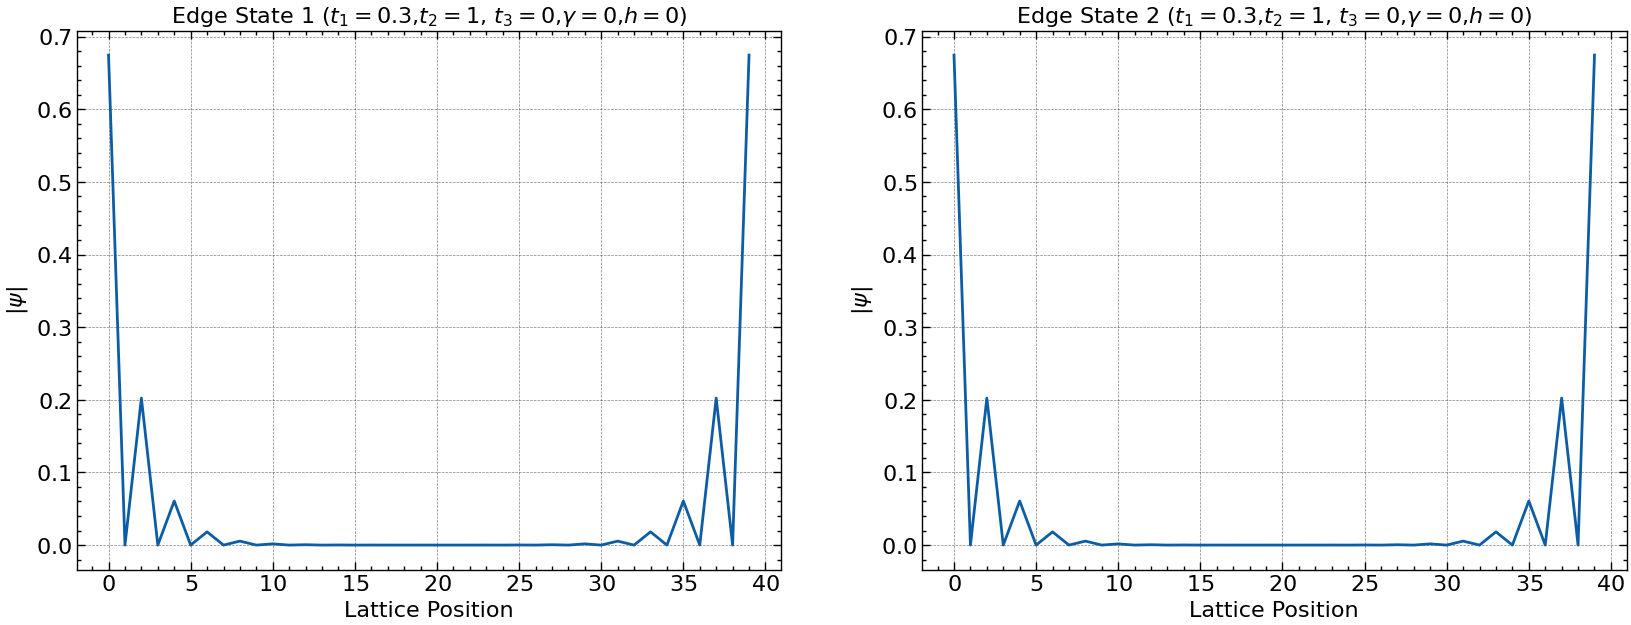

In [21]:
plot_state_edge_abs_OBC(40, 0.3,1,0,0,0,0)


We see that in this case, we obtain two zero energy states

By plotting the wavefunction, we can see that the amplitude is localised along the edges and hence these are called the edge states. These are symmetric on both the edges. Now we randomly plot a bulk state, with non-zero energy

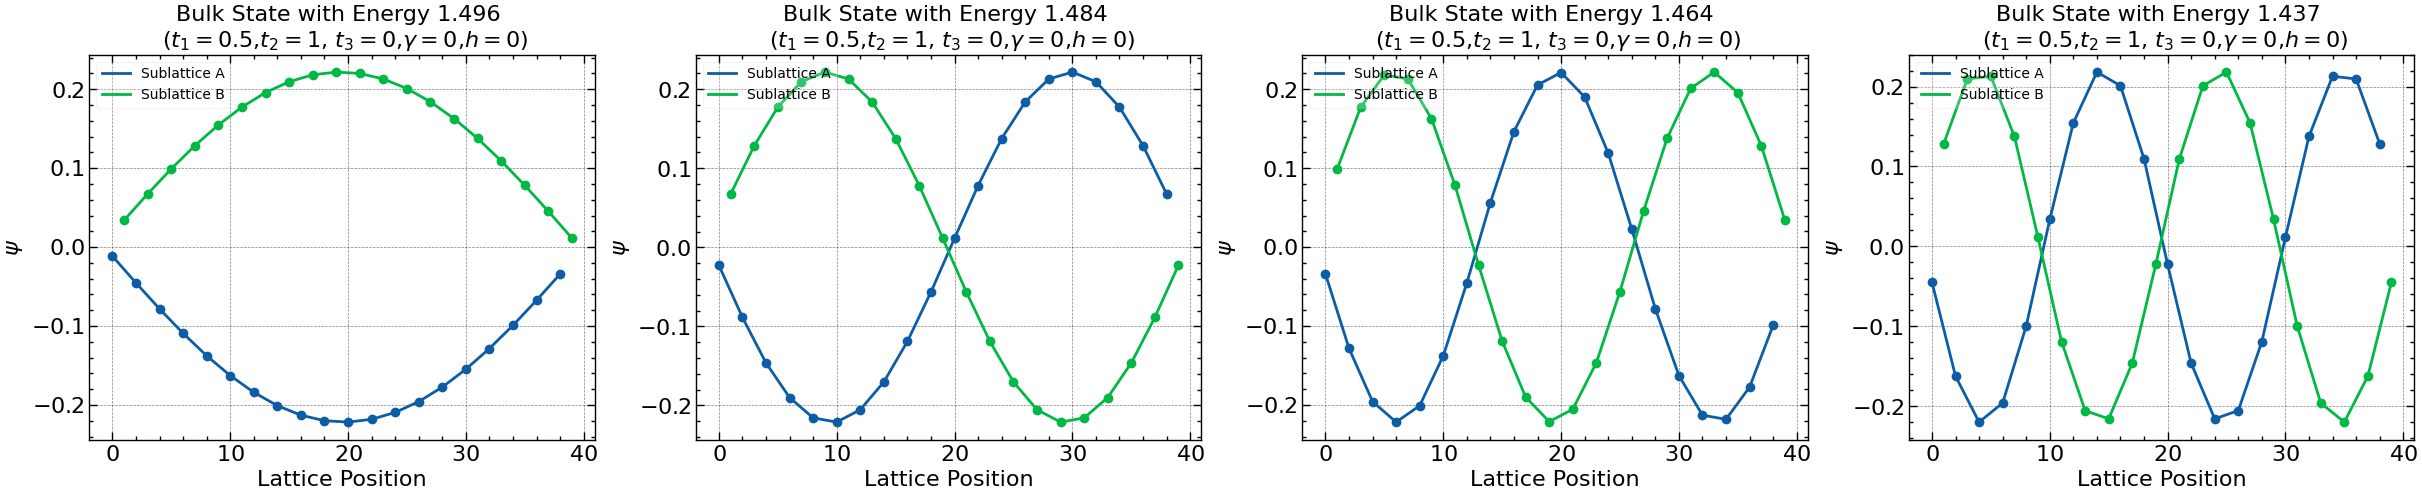

In [10]:
plot_state_bulk__real_OBC(40, 0.5,1,0,0,0,0)

We see that the bulk state wavefunction follows a sinusoidal pattern. We now plot the enegy eigenspectrum by varying the hopping parameter $t_1$, keeping $t_2=1$

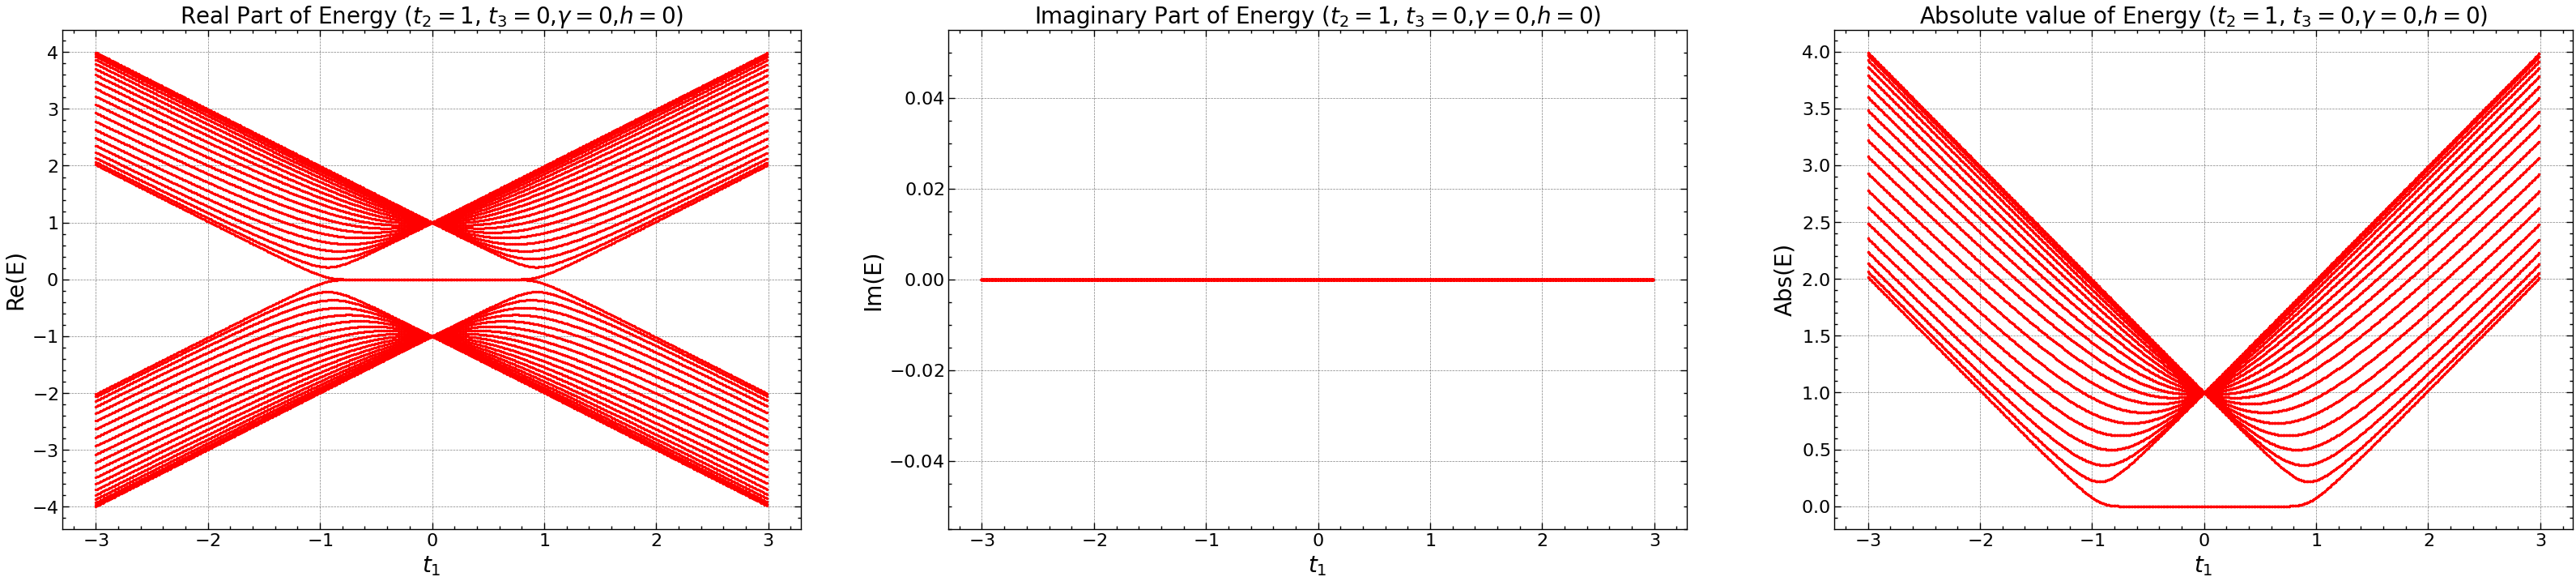

In [11]:
plot_energy_eigen_OBC(40,1,0,0,0,0)

We see that the energy eigenspectrum is symmetric and real. The imaginary part is identically zero for all values of the hopping parameter. We now move onto the non-Hermitian Model. We first incorporate the assymetric hopping term

[[38]
 [39]]


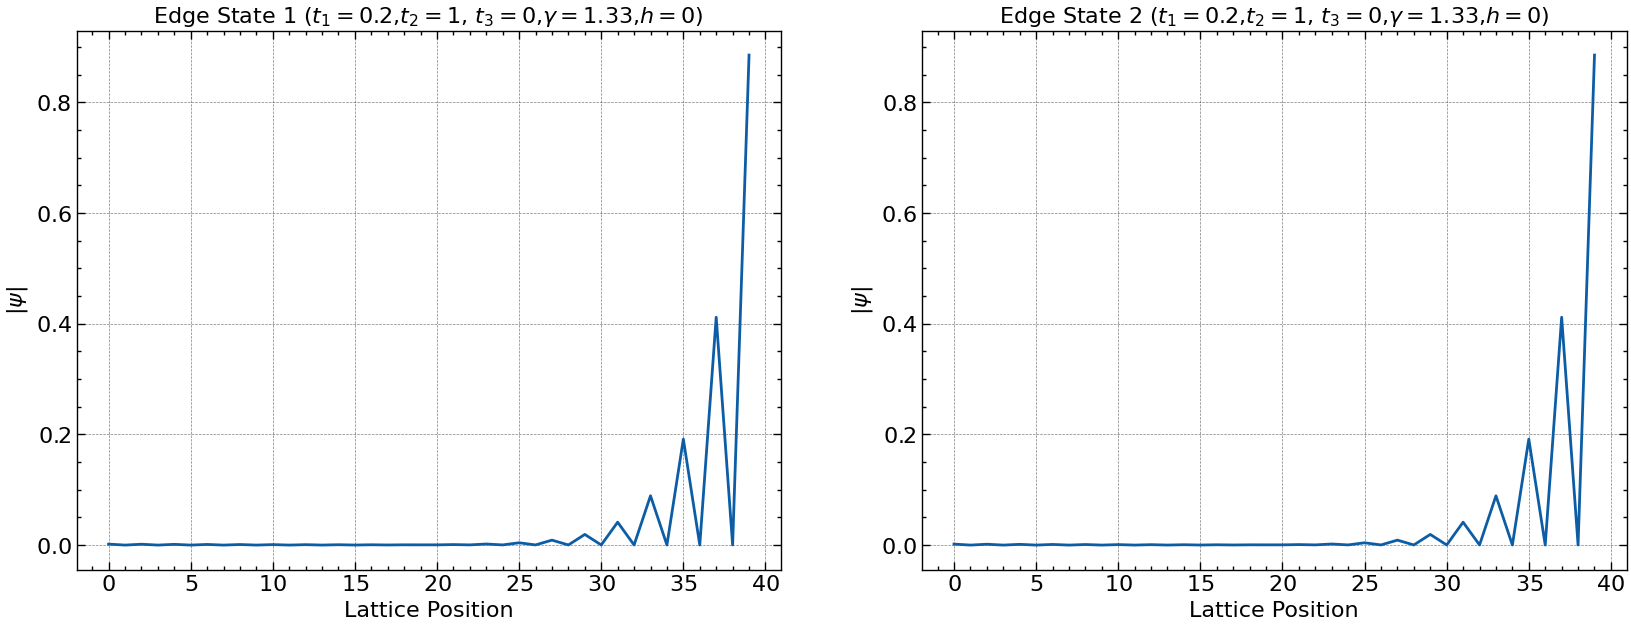

In [22]:
plot_state_edge_abs_OBC(40, 0.2,1,0,1.33,0,0)

We see that the edge states no longer remain symmetric and are localised to the right edge of the system

[[38]
 [39]]


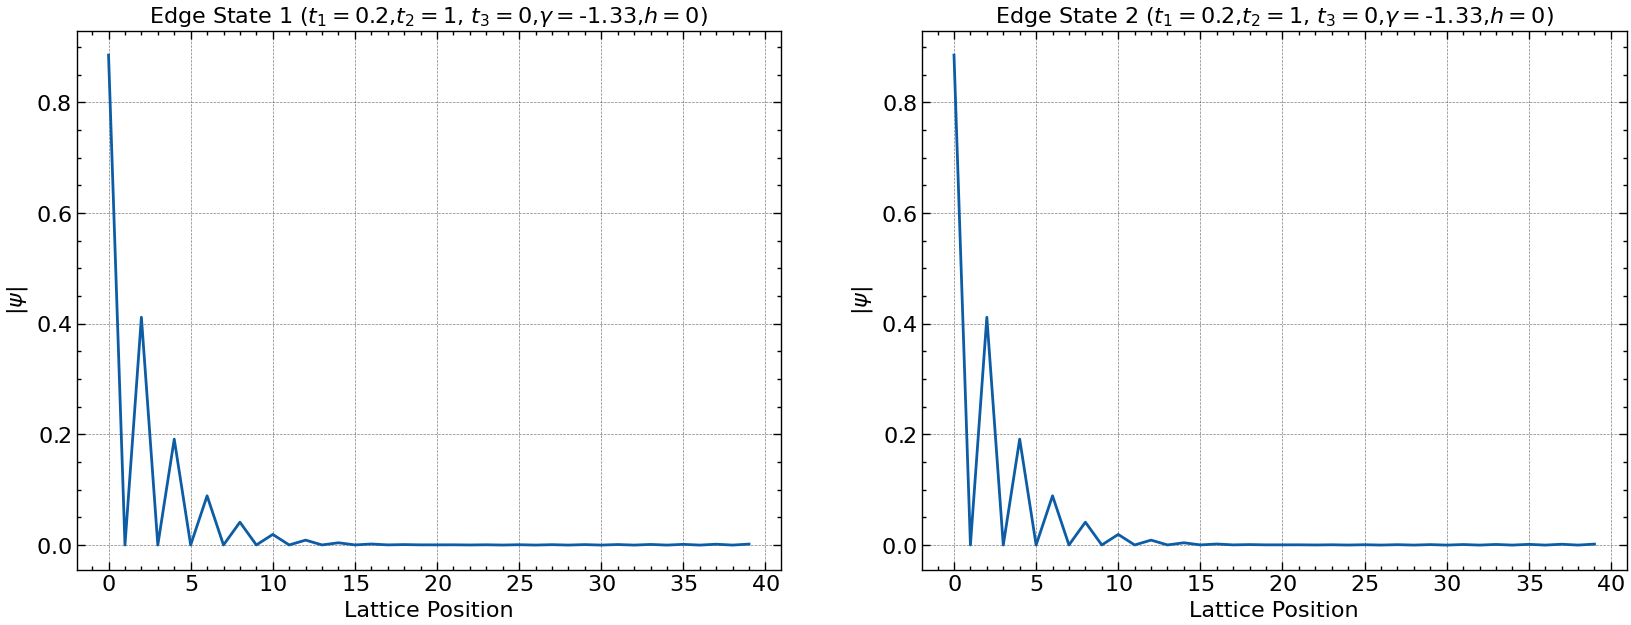

In [24]:
plot_state_edge_abs_OBC(40, 0.2,1,0,-1.33,0,0)

We see that the edge states become localised to the left edge of the system on changing the sign of the gamma parameter. Now we plot a random Bulk State (with non-zero energy).

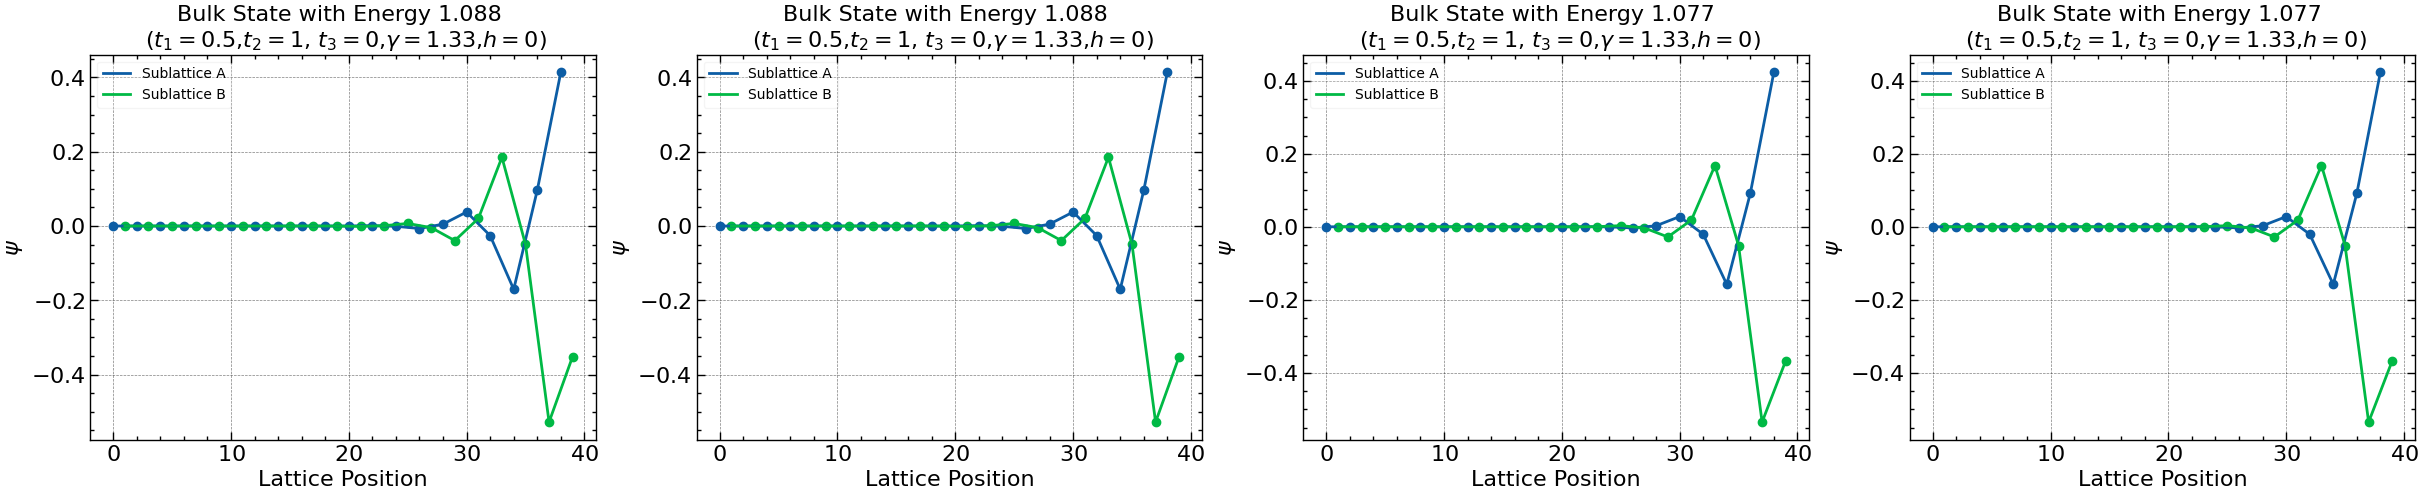

In [14]:
plot_state_bulk__real_OBC(40, 0.5,1,0,1.33,0,0)

We see that the Bulk State is also localised along the edge of the system. Hence, on introducing the $\gamma$ parameter, the bulk also gets 'edged'. This is called the Non-Hermitian Skin Effect. Now, we plot the energy eigenspectrums for this situation.

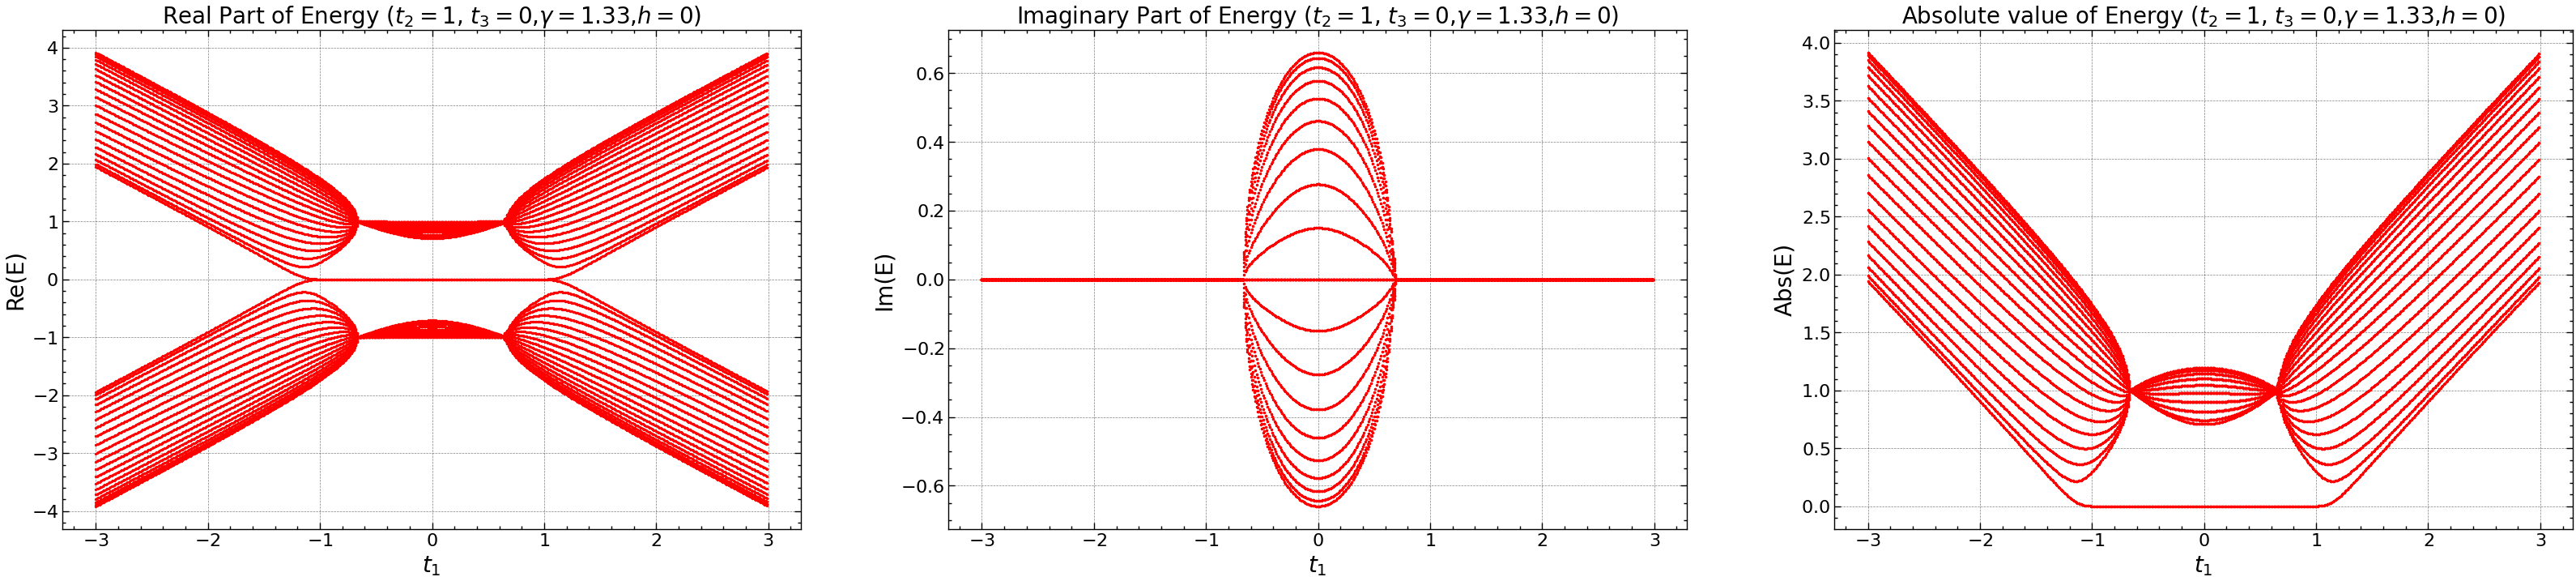

In [15]:
plot_energy_eigen_OBC(40,1,0,1.33,0,0)


We see that on introducing non-hermiticity, the energy eigenvalues no longer remain real for all parameter. Exceptional points arise where the energy values become complex. We now finally set the parameter $t_3$ to a finite value.

[[38]
 [39]]


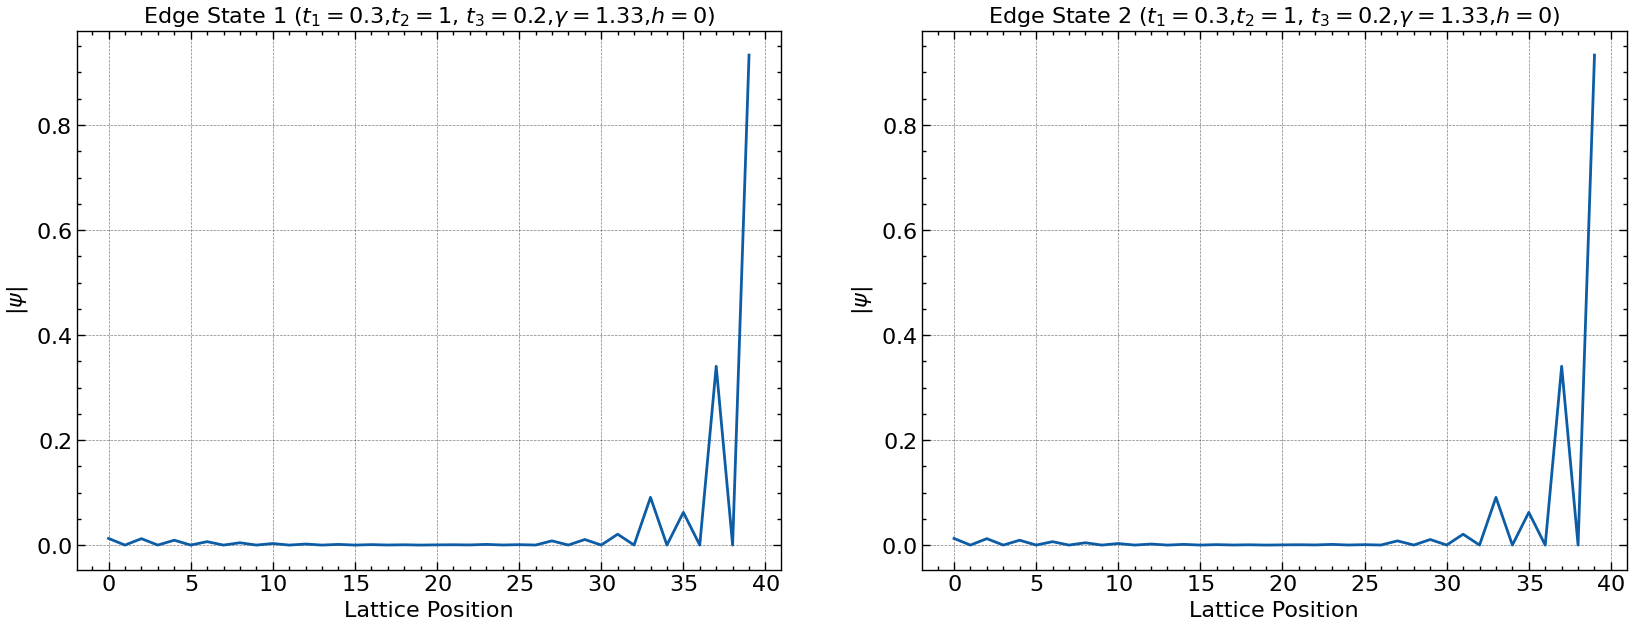

In [27]:
plot_state_edge_abs_OBC(40, 0.3,1,0.2,1.33,0,0)

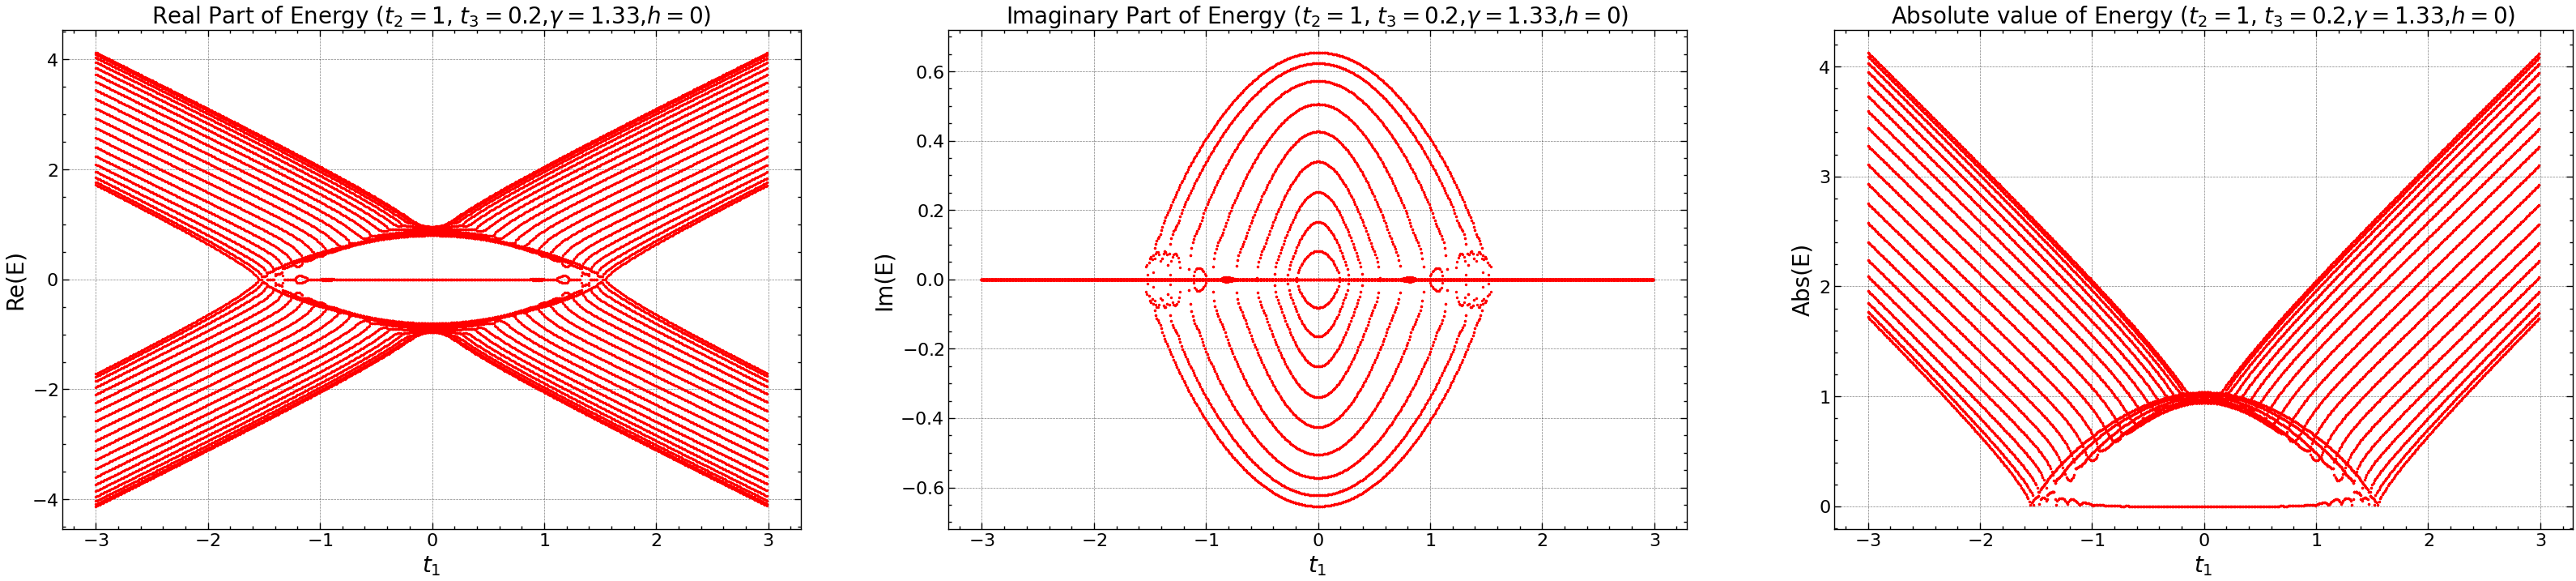

In [17]:
plot_energy_eigen_OBC(40,1,0.2,1.33,0,0)